c:\Users\bruna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


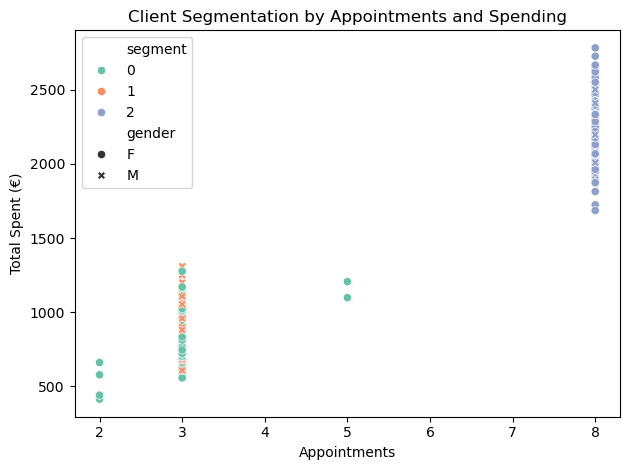

C:\Users\bruna\AppData\Local\Temp\ipykernel_34748\3708288426.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=client_summary, x='segment', y='age', palette='Set2')


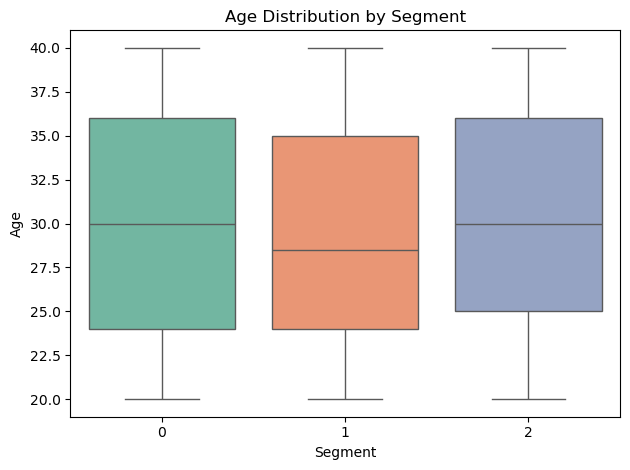

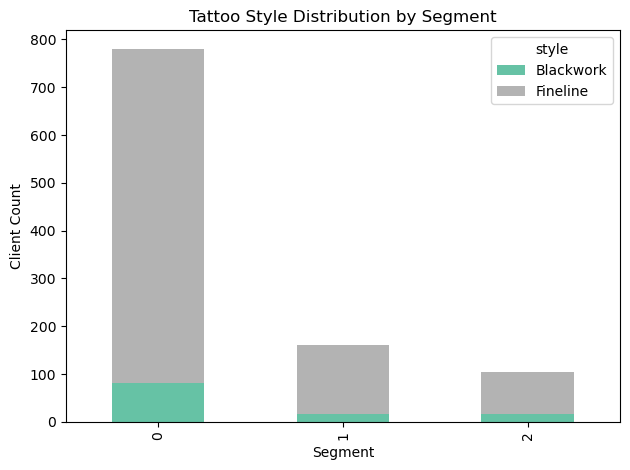

C:\Users\bruna\AppData\Local\Temp\ipykernel_34748\3708288426.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='Blues')


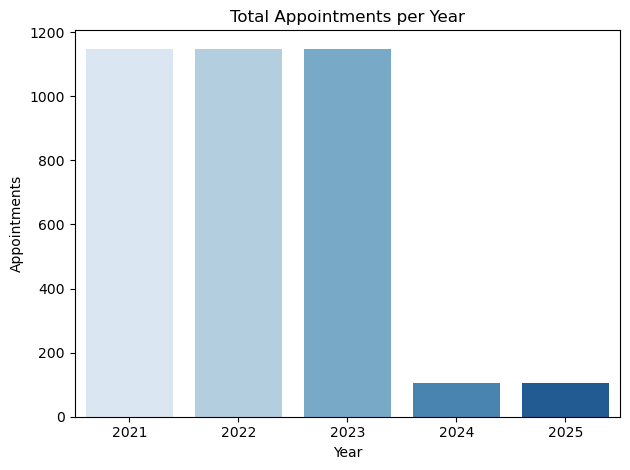

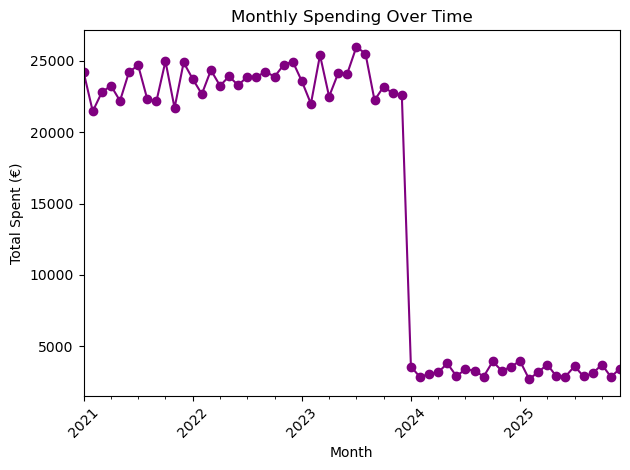

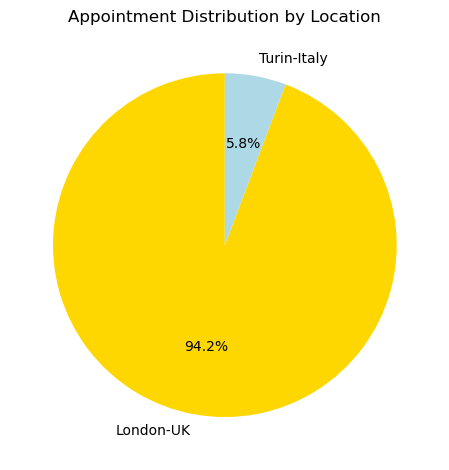

In [4]:
# 📦 Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load data
df = pd.read_csv('../data/appointments_extended.csv')
df['date'] = pd.to_datetime(df['date'])

# 📆 Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M')

# 🧹 Aggregate client-level features
client_summary = df.groupby('client_id').agg({
    'gender': 'first',
    'age': 'first',
    'style': lambda x: x.value_counts().idxmax(),
    'price': 'sum',
    'appointment_id': 'count',
    'location': 'first'
}).rename(columns={
    'price': 'total_spent',
    'appointment_id': 'num_appointments'
}).reset_index()

# 🎯 Encode gender and style
client_summary['gender_encoded'] = client_summary['gender'].map({'F': 0, 'M': 1})
client_summary['style_encoded'] = client_summary['style'].map({'Fineline': 0, 'Blackwork': 1})

# 🎯 Select features for clustering
features = ['num_appointments', 'total_spent', 'age', 'gender_encoded', 'style_encoded']
X = client_summary[features]

# ⚖️ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🤖 Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
client_summary['segment'] = kmeans.fit_predict(X_scaled)

# 💾 Save segmented data
client_summary.to_csv('../data/client_segments.csv', index=False)

# 📊 Scatterplot: Appointments vs Spending
sns.scatterplot(data=client_summary, x='num_appointments', y='total_spent',
                hue='segment', style='gender', palette='Set2')
plt.title('Client Segmentation by Appointments and Spending')
plt.xlabel('Appointments')
plt.ylabel('Total Spent (€)')
plt.tight_layout()
plt.show()

# 📊 Boxplot: Age distribution per segment
sns.boxplot(data=client_summary, x='segment', y='age', palette='Set2')
plt.title('Age Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# 📊 Bar chart: Style distribution per segment
style_counts = client_summary.groupby(['segment', 'style']).size().unstack().fillna(0)
style_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Tattoo Style Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Client Count')
plt.tight_layout()
plt.show()

# 📊 Bar chart: Total appointments per year
yearly_counts = df.groupby('year')['appointment_id'].count()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values, palette='Blues')
plt.title('Total Appointments per Year')
plt.xlabel('Year')
plt.ylabel('Appointments')
plt.tight_layout()
plt.show()

# 📈 Line chart: Total spending per month
monthly_spending = df.groupby('month')['price'].sum()
monthly_spending.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spent (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🌍 Pie chart: Appointment distribution by location
location_counts = df['location'].value_counts()
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Appointment Distribution by Location')
plt.ylabel('')
plt.tight_layout()
plt.show()